In [0]:
from google.colab import drive

import numpy as np
import pandas as pd
import h5py
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adamax, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

from PIL import Image

## functions

In [0]:
# plotting result
def result(hist):
    plt.plot(hist.history['acc'], label='correct predictions @train')
    plt.plot(hist.history['val_acc'], label='correct predictions @test')
    plt.xlabel('epoch')
    plt.ylabel('correct predictions share')
    plt.legend()
    plt.show()

    print(
        f"accuracy: {hist.history['acc'][-1]},validation accuracy: {hist.history['val_acc'][-1]}"
    )

# checkpointer function
def check(model_num):
    filepath = os.path.join(
        'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/'+model_num+'_weights-improvement-{epoch:02d}-{val_acc:.5f}-{acc:.5f}.hdf5'
    )

    checkpoint = ModelCheckpoint(
        filepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True,
        mode='max'
    )
    callback_list = [checkpoint]

    return callback_list

# plotting image
def my_img(array):
    plt.imshow(Image.fromarray(array).convert('RGBA'))
    plt.show()

def oliv_traced(df_x):
    olivetti_labels = []
    for i in range(int(x_oliv.shape[0])):
        print(i)
        img(df_x[i].reshape(64,64)*100)
        olivetti_labels.append(float(input('happy or not: ')))
        olivetti_labels = np.array(olivetti_labels)

    return olivetti_labels

# predicting for test dataset 
def pred(model, x_test):
    y_pred = model.predict(x_test)
    pred = []
    for i in range(y_pred.shape[0]):
        pred.append(np.argmax(y_pred[i]))
    pred = np.array(pred)
    return pred

In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!ls 'drive/My Drive/Colab Notebooks/neural_network/nn_diploma'

 00_weights-improvement-01-0.45000-0.51250.hdf5
 01_weights-improvement-01-0.45000-0.51250.hdf5
 img
 nn_faces.ipynb
 olivetti_X.csv
 olivetti_y.csv
 savings
 test_happy.h5
 train_happy.h5
'Задание для курсовой работы.docx'


## data upload

##### olivetti_x

In [0]:
x_oliv = np.loadtxt(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/olivetti_X.csv', 
    delimiter=','
) 

In [17]:
print(x_oliv.ndim)
print(x_oliv.shape)
x_oliv[0]

2
(400, 4096)


array([0.30991736, 0.36776859, 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ])

In [0]:
x_oliv = x_oliv.reshape(400, 64, 64)

##### olivetti_y

In [0]:
y_oliv = np.loadtxt(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/olivetti_y.csv', 
    delimiter=','
)

In [20]:
print(y_oliv.ndim)
print(y_oliv.shape)
print(set(y_oliv))

1
(400,)
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0}


In [0]:
# manual target labelling

#oliv_traced(x_oliv)

In [22]:
olivetti_labels = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1.])

olivetti_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0.

##### train_happy.h5

In [23]:
f_train = h5py.File('drive/My Drive/Colab Notebooks/neural_network/nn_diploma/train_happy.h5', 'r')
list(f_train.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [0]:
x_train_happy = f_train['train_set_x']
y_train_happy = f_train['train_set_y']

In [0]:
x_train_happy = np.array(x_train_happy)
y_train_happy = np.array(y_train_happy)

In [26]:
print(x_train_happy.shape)
print(y_train_happy.shape)

(600, 64, 64, 3)
(600,)


In [27]:
x_train_happy[0].shape

(64, 64, 3)

In [28]:
# unique values in y_train
set(y_train_happy)

{0, 1}

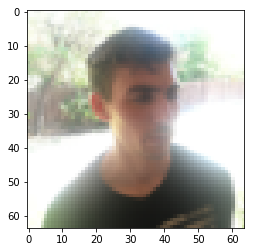

In [29]:
my_img(x_train_happy[255])

In [30]:
y_train_happy[10]

0

##### test_happy.h5

In [31]:
f_test = h5py.File('drive/My Drive/Colab Notebooks/neural_network/nn_diploma/test_happy.h5', 'r')
list(f_test.keys())


['list_classes', 'test_set_x', 'test_set_y']

In [0]:
x_test_happy = f_test['test_set_x']
y_test_happy = f_test['test_set_y']

In [0]:
x_test_happy = np.array(x_test_happy)
y_test_happy = np.array(y_test_happy)

In [34]:
print(x_test_happy.shape)
print(y_test_happy.shape)

(150, 64, 64, 3)
(150,)


## preprocessing

##### labeled dataset

In [0]:
# converting targets to categorical values / one-hot encoding
y_train_happy_cat = to_categorical(y_train_happy)

In [0]:
# converting uint8 to floats + some standardization
x_train_happy_stnd = x_train_happy / 256.
x_test_happy_stnd = x_test_happy / 256.

In [0]:
# scaling features 
v_min = x_train_happy.min(axis=(0, 1), keepdims=True)
v_max = x_train_happy.max(axis=(0, 1), keepdims=True)
x_train_happy_scld = (x_train_happy - v_min)/(v_max - v_min)

v_min = x_test_happy.min(axis=(0, 1), keepdims=True)
v_max = x_test_happy.max(axis=(0, 1), keepdims=True)
x_test_happy_scld = (x_test_happy - v_min)/(v_max - v_min)

##### unlabeled dataset

In [0]:
x_oliv = x_oliv.reshape((x_oliv.shape[0], 64, 64, 1))

In [0]:
#x_oliv_train, x_oliv_test, olivetti_labels_cat_train, olivetti_labels_cat_test = train_test_split(x_oliv, olivetti_labels_cat, test_size=0.2)  
x_oliv_train, x_oliv_test, olivetti_labels_train, olivetti_labels_test = train_test_split(x_oliv, olivetti_labels, test_size=0.2, random_state=42)  

In [0]:
# converting targets to categorical values / one-hot encoding
olivetti_labels_train_cat = to_categorical(olivetti_labels_train)

In [0]:
# scaling features 
v_min = x_oliv_train.min(axis=(0, 1), keepdims=True)
v_max = x_oliv_train.max(axis=(0, 1), keepdims=True)
x_oliv_train_scld = (x_oliv_train - v_min)/(v_max - v_min)

v_min = x_oliv_test.min(axis=(0, 1), keepdims=True)
v_max = x_oliv_test.max(axis=(0, 1), keepdims=True)
x_oliv_test_scld = (x_oliv_test - v_min)/(v_max - v_min)

## build, fit & predict

### standard convolutional

##### labeled dataset

Train on 480 samples, validate on 120 samples
Epoch 1/100
400/480 [========================>.....] - ETA: 0s - loss: 2.5817 - acc: 0.5500
Epoch 00001: val_acc improved from -inf to 0.55000, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/00_weights-improvement-01-0.55000-0.53333.hdf5
480/480 [==============================] - 6s 13ms/sample - loss: 2.4133 - acc: 0.5333 - val_loss: 1.4567 - val_acc: 0.5500
Epoch 2/100
400/480 [========================>.....] - ETA: 0s - loss: 0.7603 - acc: 0.4775
Epoch 00002: val_acc did not improve from 0.55000
480/480 [==============================] - 1s 2ms/sample - loss: 0.7470 - acc: 0.4917 - val_loss: 0.6913 - val_acc: 0.4333
Epoch 3/100
400/480 [========================>.....] - ETA: 0s - loss: 0.6824 - acc: 0.5375
Epoch 00003: val_acc did not improve from 0.55000
480/480 [==============================] - 1s 2ms/sample - loss: 0.6837 - acc: 0.5417 - val_loss: 0.6831 - val_acc: 0.5500
Epoch 4/100
400/480 [=======

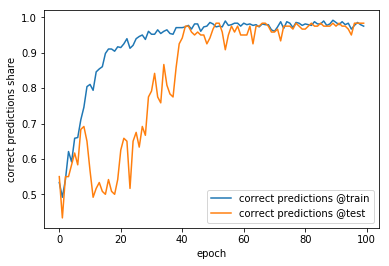

accuracy: 0.9750000238418579,validation accuracy: 0.9833333492279053


In [0]:
# 00 conv2D based on 
# categorical values and metrics 
# unscaled x train

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 3)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_train_happy,
    y_train_happy_cat,
    batch_size=batch_size,
    epochs=100,
    callbacks=check('00'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_test_happy)
accuracy_score(y_test_happy, predictions)

0.9466666666666667

Train on 480 samples, validate on 120 samples
Epoch 1/100
400/480 [========================>.....] - ETA: 0s - loss: 3.0415 - acc: 0.5025
Epoch 00001: val_acc improved from -inf to 0.45000, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/01_weights-improvement-01-0.45000-0.50417.hdf5
480/480 [==============================] - 7s 14ms/sample - loss: 2.6596 - acc: 0.5042 - val_loss: 0.6961 - val_acc: 0.4500
Epoch 2/100
400/480 [========================>.....] - ETA: 0s - loss: 0.8206 - acc: 0.5225
Epoch 00002: val_acc did not improve from 0.45000
480/480 [==============================] - 1s 2ms/sample - loss: 0.7970 - acc: 0.5250 - val_loss: 0.6955 - val_acc: 0.4500
Epoch 3/100
400/480 [========================>.....] - ETA: 0s - loss: 0.6847 - acc: 0.5425
Epoch 00003: val_acc did not improve from 0.45000
480/480 [==============================] - 1s 2ms/sample - loss: 0.6863 - acc: 0.5396 - val_loss: 0.6945 - val_acc: 0.4500
Epoch 4/100
400/480 [=======

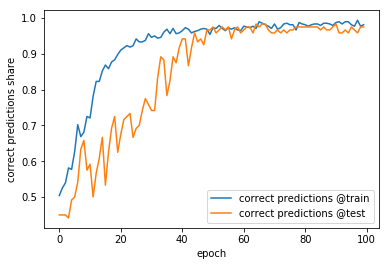

accuracy: 0.981249988079071,validation accuracy: 0.9750000238418579


In [0]:
# 01 
# standardized x train

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 3)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_train_happy_stnd,
    y_train_happy_cat,
    batch_size=batch_size,
    epochs=100,
    callbacks=check('01'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_test_happy_stnd)
accuracy_score(y_test_happy, predictions)

0.9733333333333334

Train on 480 samples, validate on 120 samples
Epoch 1/100
400/480 [========================>.....] - ETA: 0s - loss: 4.4944 - acc: 0.4975
Epoch 00001: val_acc improved from -inf to 0.55000, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/02_weights-improvement-01-0.55000-0.49583.hdf5
480/480 [==============================] - 7s 14ms/sample - loss: 3.9167 - acc: 0.4958 - val_loss: 0.6870 - val_acc: 0.5500
Epoch 2/100
400/480 [========================>.....] - ETA: 0s - loss: 0.8139 - acc: 0.4525
Epoch 00002: val_acc improved from 0.55000 to 0.55833, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/02_weights-improvement-02-0.55833-0.46042.hdf5
480/480 [==============================] - 1s 2ms/sample - loss: 0.7997 - acc: 0.4604 - val_loss: 0.6904 - val_acc: 0.5583
Epoch 3/100
400/480 [========================>.....] - ETA: 0s - loss: 0.7000 - acc: 0.5175
Epoch 00003: val_acc did not improve from 0.55833
480/480 [=========

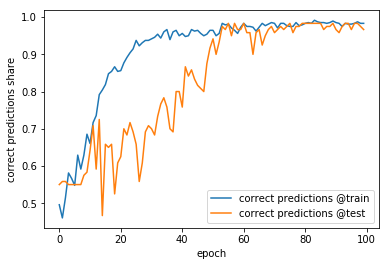

accuracy: 0.9833333492279053,validation accuracy: 0.9666666388511658


In [0]:
# 02 
# scaled x train

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 3)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_train_happy_scld,
    y_train_happy_cat,
    batch_size=batch_size,
    epochs=100,
    callbacks=check('02'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_test_happy_scld)
accuracy_score(y_test_happy, predictions)

0.98

##### unlabeled dataset 

Train on 256 samples, validate on 64 samples
Epoch 1/200
200/256 [======================>.......] - ETA: 0s - loss: 3.6908 - acc: 0.5950
Epoch 00001: val_acc improved from -inf to 0.40625, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/03_weights-improvement-01-0.40625-0.57422.hdf5
256/256 [==============================] - 7s 28ms/sample - loss: 3.1451 - acc: 0.5742 - val_loss: 0.7296 - val_acc: 0.4062
Epoch 2/200
200/256 [======================>.......] - ETA: 0s - loss: 1.2632 - acc: 0.4650
Epoch 00002: val_acc improved from 0.40625 to 0.59375, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/03_weights-improvement-02-0.59375-0.49609.hdf5
256/256 [==============================] - 1s 2ms/sample - loss: 1.1699 - acc: 0.4961 - val_loss: 0.6749 - val_acc: 0.5938
Epoch 3/200
200/256 [======================>.......] - ETA: 0s - loss: 0.8265 - acc: 0.6100
Epoch 00003: val_acc did not improve from 0.59375
256/256 [==========

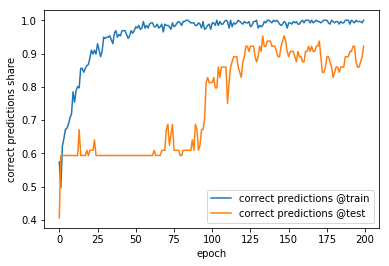

accuracy: 1.0,validation accuracy: 0.921875


In [0]:
# 03 
# unscaled x train


batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=200,
    callbacks=check('03'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test)
accuracy_score(olivetti_labels_test, predictions)

0.575

Train on 256 samples, validate on 64 samples
Epoch 1/200
200/256 [======================>.......] - ETA: 0s - loss: 1.7427 - acc: 0.4750
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.50391.hdf5
256/256 [==============================] - 4s 18ms/sample - loss: 3.0289 - acc: 0.5039 - val_loss: 0.6219 - val_acc: 0.6719
Epoch 2/200
200/256 [======================>.......] - ETA: 0s - loss: 3.2099 - acc: 0.5750
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 0s 2ms/sample - loss: 2.6649 - acc: 0.5859 - val_loss: 0.7071 - val_acc: 0.3281
Epoch 3/200
200/256 [======================>.......] - ETA: 0s - loss: 0.8968 - acc: 0.4000
Epoch 00003: val_acc did not improve from 0.67188
256/256 [==============================] - 0s 2ms/sample - loss: 0.8654 - acc: 0.4102 - val_loss: 0.6949 - val_acc: 0.2812
Epoch 4/200
200/256 [========

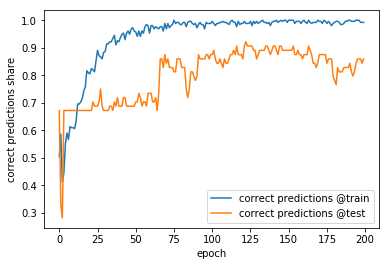

accuracy: 0.9921875,validation accuracy: 0.859375


In [0]:
# 04 
# scaled x train

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=200,
    callbacks=check('04'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.6

Train on 256 samples, validate on 64 samples
Epoch 1/200
200/256 [======================>.......] - ETA: 4s - loss: 24.3304 - acc: 0.5000
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.48047.hdf5
256/256 [==============================] - 28s 110ms/sample - loss: 19.4077 - acc: 0.4805 - val_loss: 0.6386 - val_acc: 0.6719
Epoch 2/200
200/256 [======================>.......] - ETA: 1s - loss: 0.9308 - acc: 0.6000
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 5s 19ms/sample - loss: 0.8732 - acc: 0.6016 - val_loss: 0.6699 - val_acc: 0.6719
Epoch 3/200
200/256 [======================>.......] - ETA: 1s - loss: 0.6632 - acc: 0.6000
Epoch 00003: val_acc did not improve from 0.67188
256/256 [==============================] - 5s 19ms/sample - loss: 0.6601 - acc: 0.6094 - val_loss: 0.6898 - val_acc: 0.6719
Epoch 4/200
200/256 [==

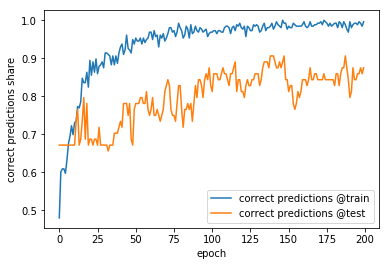

accuracy: 0.99609375,validation accuracy: 0.875


In [0]:
# 05 
# increased neurons in convolutional layers (64 -> 256) 

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(256, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(256, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=200,
    callbacks=check('05'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.5875

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 1s - loss: 4.0998 - acc: 0.5950
Epoch 00001: val_acc improved from -inf to 0.32812, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.32812-0.56250.hdf5
256/256 [==============================] - 12s 46ms/sample - loss: 6.4293 - acc: 0.5625 - val_loss: 0.8521 - val_acc: 0.3281
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 3.7435 - acc: 0.4000
Epoch 00002: val_acc improved from 0.32812 to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-02-0.67188-0.41406.hdf5
256/256 [==============================] - 2s 6ms/sample - loss: 3.0811 - acc: 0.4141 - val_loss: 0.6880 - val_acc: 0.6719
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 0.6783 - acc: 0.5900
Epoch 00003: val_acc did not improve from 0.67188
256/256 [=========

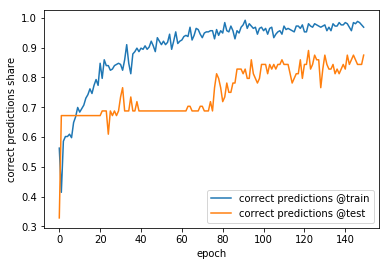

accuracy: 0.96875,validation accuracy: 0.875


In [0]:
# 06 
# increased neurons in convolutional layers (64 -> 128)
# increased sequential layer (512 -> 1024)

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(128, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(128, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('06'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.5375

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 6.1841 - acc: 0.5100
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.54688.hdf5
256/256 [==============================] - 6s 23ms/sample - loss: 5.5059 - acc: 0.5469 - val_loss: 0.6594 - val_acc: 0.6719
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 0.7953 - acc: 0.5750
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 1s 5ms/sample - loss: 0.7938 - acc: 0.5547 - val_loss: 0.7132 - val_acc: 0.3281
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 0.7826 - acc: 0.3700
Epoch 00003: val_acc improved from 0.67188 to 0.68750, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-03-0.68750-0.40625.hdf5
256/256 [==========

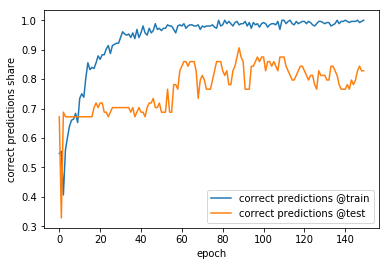

accuracy: 1.0,validation accuracy: 0.828125


In [0]:
# 07 
# added additional layers

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(128, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(128, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('07'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.625

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 1.7289 - acc: 0.5750
Epoch 00001: val_acc improved from -inf to 0.32812, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.32812-0.55469.hdf5
256/256 [==============================] - 6s 22ms/sample - loss: 1.6507 - acc: 0.5547 - val_loss: 0.7029 - val_acc: 0.3281
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 1.0209 - acc: 0.4850
Epoch 00002: val_acc improved from 0.32812 to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-02-0.67188-0.51953.hdf5
256/256 [==============================] - 1s 3ms/sample - loss: 0.9800 - acc: 0.5195 - val_loss: 0.6798 - val_acc: 0.6719
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 0.7246 - acc: 0.6600
Epoch 00003: val_acc did not improve from 0.67188
256/256 [==========

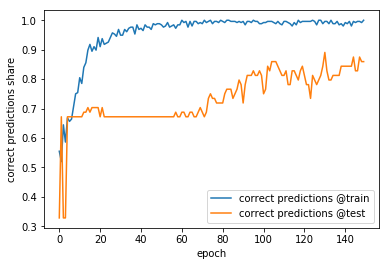

accuracy: 1.0,validation accuracy: 0.859375


In [0]:
# 08
# recalled the initial number of neurons (64) in conv2d layers
# with additional layers added

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('08'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.65

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 487.1447 - acc: 0.5350
Epoch 00001: val_acc improved from -inf to 0.32812, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.32812-0.50391.hdf5
256/256 [==============================] - 10s 38ms/sample - loss: 2821.2992 - acc: 0.5039 - val_loss: 1128295.2500 - val_acc: 0.3281
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 1302.9964 - acc: 0.5450
Epoch 00002: val_acc improved from 0.32812 to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-02-0.67188-0.49609.hdf5
256/256 [==============================] - 1s 2ms/sample - loss: 1020.7452 - acc: 0.4961 - val_loss: 0.7885 - val_acc: 0.6719
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 4.0001 - acc: 0.5950
Epoch 00003: val_acc did not improve from 0.67188
2

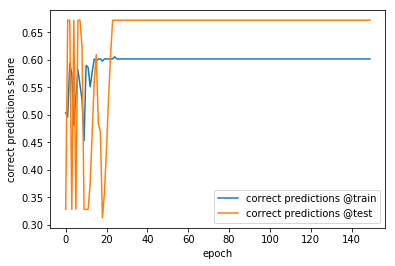

accuracy: 0.6015625,validation accuracy: 0.671875


In [0]:
# 09 
# decreased learning rate of adam optimizer

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=1e-1),
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('09'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.6375

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 0.7913 - acc: 0.5800
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.58203.hdf5
256/256 [==============================] - 10s 38ms/sample - loss: 0.8062 - acc: 0.5820 - val_loss: 0.6839 - val_acc: 0.6719
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 0.8355 - acc: 0.5750
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 1s 2ms/sample - loss: 0.8649 - acc: 0.5625 - val_loss: 0.6950 - val_acc: 0.3281
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 0.8858 - acc: 0.5250
Epoch 00003: val_acc did not improve from 0.67188
256/256 [==============================] - 0s 2ms/sample - loss: 0.8543 - acc: 0.5430 - val_loss: 0.6901 - val_acc: 0.6719
Epoch 4/150
200/256 [=======

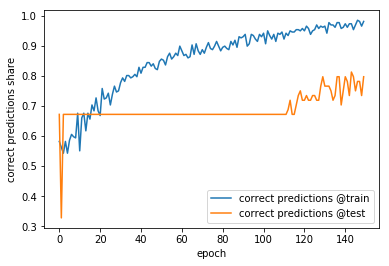

accuracy: 0.98046875,validation accuracy: 0.796875


In [0]:
# 10 
# applied sgd optimizer

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('10'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.6

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 1.9394 - acc: 0.4600
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.52344.hdf5
256/256 [==============================] - 11s 42ms/sample - loss: 3.0637 - acc: 0.5234 - val_loss: 0.6408 - val_acc: 0.6719
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 1.2044 - acc: 0.5900
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 1s 2ms/sample - loss: 1.0771 - acc: 0.6055 - val_loss: 0.6838 - val_acc: 0.6719
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 0.6652 - acc: 0.5900
Epoch 00003: val_acc improved from 0.67188 to 0.68750, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-03-0.68750-0.60547.hdf5
256/256 [=========

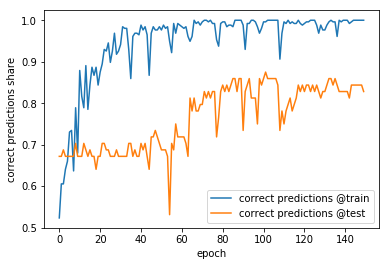

accuracy: 1.0,validation accuracy: 0.828125


In [0]:
# 11
# applied rmsprop optimizer

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('11'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.6375

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 5.9621 - acc: 0.5350
Epoch 00001: val_acc improved from -inf to 0.32812, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.32812-0.53906.hdf5
256/256 [==============================] - 12s 48ms/sample - loss: 5.6771 - acc: 0.5391 - val_loss: 0.7228 - val_acc: 0.3281
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 0.7529 - acc: 0.3950
Epoch 00002: val_acc did not improve from 0.32812
256/256 [==============================] - 1s 2ms/sample - loss: 0.7638 - acc: 0.3906 - val_loss: 0.7895 - val_acc: 0.3281
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 0.7371 - acc: 0.4100
Epoch 00003: val_acc did not improve from 0.32812
256/256 [==============================] - 0s 2ms/sample - loss: 0.7304 - acc: 0.4258 - val_loss: 0.7036 - val_acc: 0.3281
Epoch 4/150
200/256 [=======

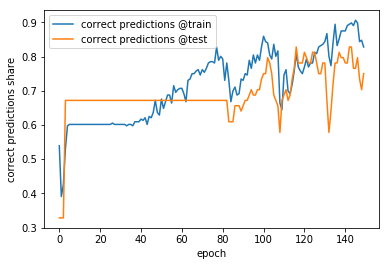

accuracy: 0.828125,validation accuracy: 0.75


In [0]:
# 12
# increased dropout (0.25 -> 0.5)

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('12'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.675

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 4.7133 - acc: 0.5550
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.56250.hdf5
256/256 [==============================] - 15s 59ms/sample - loss: 4.7378 - acc: 0.5625 - val_loss: 5.2888 - val_acc: 0.6719
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 4.3688 - acc: 0.6000
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 1s 2ms/sample - loss: 3.8789 - acc: 0.5703 - val_loss: 0.6460 - val_acc: 0.6719
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 1.0601 - acc: 0.4650
Epoch 00003: val_acc did not improve from 0.67188
256/256 [==============================] - 0s 2ms/sample - loss: 0.9937 - acc: 0.4609 - val_loss: 0.7318 - val_acc: 0.3281
Epoch 4/150
200/256 [=======

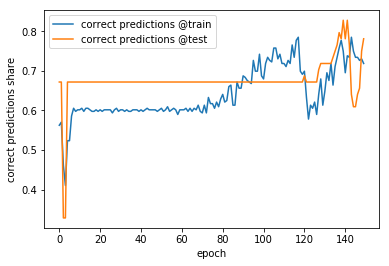

accuracy: 0.71875,validation accuracy: 0.78125


In [0]:
# 13
# increased dropout (0.25 -> 0.75)

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.7))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(2, activation='relu'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('13'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.6875

Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 4.2294 - acc: 0.5450
Epoch 00001: val_acc improved from -inf to 0.67188, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/04_weights-improvement-01-0.67188-0.54297.hdf5
256/256 [==============================] - 15s 59ms/sample - loss: 4.4793 - acc: 0.5430 - val_loss: 5.2888 - val_acc: 0.6719
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 5.2637 - acc: 0.6250
Epoch 00002: val_acc did not improve from 0.67188
256/256 [==============================] - 1s 2ms/sample - loss: 5.7046 - acc: 0.6055 - val_loss: 5.2888 - val_acc: 0.6719
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 5.1625 - acc: 0.6200
Epoch 00003: val_acc did not improve from 0.67188
256/256 [==============================] - 0s 2ms/sample - loss: 5.4535 - acc: 0.5938 - val_loss: 5.2888 - val_acc: 0.6719
Epoch 4/150
200/256 [=======

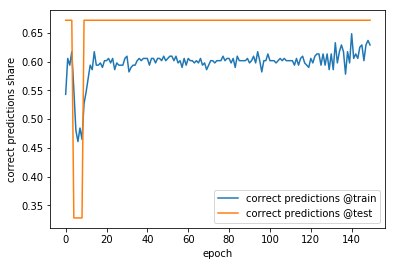

accuracy: 0.62890625,validation accuracy: 0.671875


In [0]:
# 14
# increased dropout (0.25 -> 0.8)

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.8))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='relu'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('04'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [0]:
predictions = pred(model, x_oliv_test_scld)
accuracy_score(olivetti_labels_test, predictions)

0.6375

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 256 samples, validate on 64 samples
Epoch 1/150
200/256 [======================>.......] - ETA: 0s - loss: 3.3255 - acc: 0.6050
Epoch 00001: val_acc improved from -inf to 0.56250, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/14_weights-improvement-01-0.56250-0.58984.hdf5
256/256 [==============================] - 7s 29ms/sample - loss: 3.4448 - acc: 0.5898 - val_loss: 0.7051 - val_acc: 0.5625
Epoch 2/150
200/256 [======================>.......] - ETA: 0s - loss: 2.5867 - acc: 0.5850
Epoch 00002: val_acc did not improve from 0.56250
256/256 [==============================] - 1s 3ms/sample - loss: 2.5493 - acc: 0.5938 - val_loss: 0.6854 - val_acc: 0.5625
Epoch 3/150
200/256 [======================>.......] - ETA: 0s - loss: 1.6579 - acc: 0.5700
Epoch 00003: val_acc did not improve from 0.56250
256/256 [==============================] - 1s 3ms/sample -

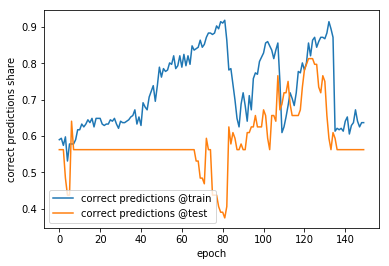

accuracy: 0.63671875,validation accuracy: 0.5625


In [0]:
# 14
# added more conv2d layers

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 1)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(2, activation='relu'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_oliv_train_scld,
    olivetti_labels_train_cat,
    batch_size=batch_size,
    epochs=150,
    callbacks=check('14'),
    validation_split=0.2,
    verbose=1
)

result(history)

## testing my own image


In [0]:
imgn1 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgn1.jpg',
    target_size=(64, 64)
)

imgn2 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgn2.jpg',
    target_size=(64, 64)
)

imgn3 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgn3.jpg',
    target_size=(64, 64)
)

imgn4 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgn4.jpg',
    target_size=(64, 64)
)

imgn5 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgn5.jpg',
    target_size=(64, 64)
)

imgp1 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgp1.jpg',
    target_size=(64, 64)
)

imgp2 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgp2.jpg',
    target_size=(64, 64)
)

imgp3 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgp3.jpg',
    target_size=(64, 64)
)

imgp4 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgp4.jpg',
    target_size=(64, 64)
)

imgp5 = image.load_img(
    'drive/My Drive/Colab Notebooks/neural_network/nn_diploma/img/imgp5.jpg',
    target_size=(64, 64)
)

In [0]:
imgn1_array = image.img_to_array(imgn1)
imgn1_array = np.expand_dims(imgn1_array, axis=0)

imgn2_array = image.img_to_array(imgn2)
imgn2_array = np.expand_dims(imgn2_array, axis=0)

imgn3_array = image.img_to_array(imgn3)
imgn3_array = np.expand_dims(imgn3_array, axis=0)

imgn4_array = image.img_to_array(imgn4)
imgn4_array = np.expand_dims(imgn4_array, axis=0)

imgn5_array = image.img_to_array(imgn5)
imgn5_array = np.expand_dims(imgn5_array, axis=0)

imgp1_array = image.img_to_array(imgp1)
imgp1_array = np.expand_dims(imgp1_array, axis=0)

imgp2_array = image.img_to_array(imgp2)
imgp2_array = np.expand_dims(imgp2_array, axis=0)

imgp3_array = image.img_to_array(imgp3)
imgp3_array = np.expand_dims(imgp3_array, axis=0)

imgp4_array = image.img_to_array(imgp4)
imgp4_array = np.expand_dims(imgp4_array, axis=0)

imgp5_array = image.img_to_array(imgp5)
imgp5_array = np.expand_dims(imgp5_array, axis=0)

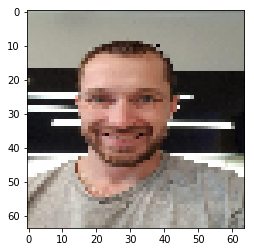

In [55]:
plt.imshow(imgp1)

In [0]:
# scaling features 
v_min = imgn1_array.min(axis=(0, 1), keepdims=True)
v_max = imgn1_array.max(axis=(0, 1), keepdims=True)
imgn1_array_scld = (imgn1_array - v_min)/(v_max - v_min)

v_min = imgn2_array.min(axis=(0, 1), keepdims=True)
v_max = imgn2_array.max(axis=(0, 1), keepdims=True)
imgn2_array_scld = (imgn2_array - v_min)/(v_max - v_min)

v_min = imgn3_array.min(axis=(0, 1), keepdims=True)
v_max = imgn3_array.max(axis=(0, 1), keepdims=True)
imgn3_array_scld = (imgn3_array - v_min)/(v_max - v_min)

v_min = imgn4_array.min(axis=(0, 1), keepdims=True)
v_max = imgn4_array.max(axis=(0, 1), keepdims=True)
imgn4_array_scld = (imgn4_array - v_min)/(v_max - v_min)

v_min = imgn5_array.min(axis=(0, 1), keepdims=True)
v_max = imgn5_array.max(axis=(0, 1), keepdims=True)
imgn5_array_scld = (imgn5_array - v_min)/(v_max - v_min)

v_min = imgp1_array.min(axis=(0, 1), keepdims=True)
v_max = imgp1_array.max(axis=(0, 1), keepdims=True)
imgp1_array_scld = (imgp1_array - v_min)/(v_max - v_min)

v_min = imgp2_array.min(axis=(0, 1), keepdims=True)
v_max = imgp2_array.max(axis=(0, 1), keepdims=True)
imgp2_array_scld = (imgp2_array - v_min)/(v_max - v_min)

v_min = imgp3_array.min(axis=(0, 1), keepdims=True)
v_max = imgp3_array.max(axis=(0, 1), keepdims=True)
imgp3_array_scld = (imgp3_array - v_min)/(v_max - v_min)

v_min = imgp4_array.min(axis=(0, 1), keepdims=True)
v_max = imgp4_array.max(axis=(0, 1), keepdims=True)
imgp4_array_scld = (imgp4_array - v_min)/(v_max - v_min)

v_min = imgp5_array.min(axis=(0, 1), keepdims=True)
v_max = imgp5_array.max(axis=(0, 1), keepdims=True)
imgp5_array_scld = (imgp5_array - v_min)/(v_max - v_min)

Train on 480 samples, validate on 120 samples
Epoch 1/100
400/480 [========================>.....] - ETA: 0s - loss: 3.9594 - acc: 0.5125
Epoch 00001: val_acc improved from -inf to 0.45000, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/02_weights-improvement-01-0.45000-0.51875.hdf5
480/480 [==============================] - 2s 4ms/sample - loss: 3.7269 - acc: 0.5188 - val_loss: 0.8663 - val_acc: 0.4500
Epoch 2/100
400/480 [========================>.....] - ETA: 0s - loss: 0.9514 - acc: 0.5150
Epoch 00002: val_acc improved from 0.45000 to 0.48333, saving model to drive/My Drive/Colab Notebooks/neural_network/nn_diploma/savings/02_weights-improvement-02-0.48333-0.51250.hdf5
480/480 [==============================] - 1s 2ms/sample - loss: 0.9086 - acc: 0.5125 - val_loss: 0.6916 - val_acc: 0.4833
Epoch 3/100
400/480 [========================>.....] - ETA: 0s - loss: 0.6960 - acc: 0.5175
Epoch 00003: val_acc improved from 0.48333 to 0.55000, saving model t

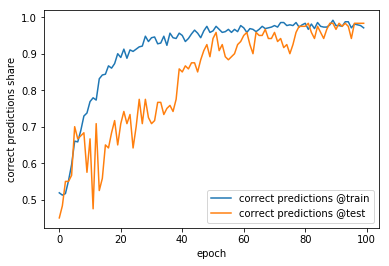

accuracy: 0.9708333611488342,validation accuracy: 0.9833333492279053


In [57]:
# 02 
# scaled x train

batch_size = 100

model = Sequential()
model.add(BatchNormalization(input_shape=(64, 64, 3)))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    x_train_happy_scld,
    y_train_happy_cat,
    batch_size=batch_size,
    epochs=100,
    callbacks=check('02'),
    validation_split=0.2,
    verbose=1
)

result(history)

In [58]:
predictions = pred(model, x_test_happy_scld)
accuracy_score(y_test_happy, predictions)

0.9733333333333334

In [60]:
print('no smile, predicted:', pred(model, imgn1_array_scld))
print('no smile, predicted:', pred(model, imgn2_array_scld))
print('no smile, predicted:', pred(model, imgn3_array_scld))
print('no smile, predicted:', pred(model, imgn4_array_scld))
print('no smile, predicted:', pred(model, imgn5_array_scld))
print('smile, predicted:', pred(model, imgp1_array_scld))
print('smile, predicted:', pred(model, imgp2_array_scld))
print('smile, predicted:', pred(model, imgp3_array_scld))
print('smile, predicted:', pred(model, imgp4_array_scld))
print('smile, predicted:', pred(model, imgp5_array_scld))

no smile, predicted: [0]
no smile, predicted: [1]
no smile, predicted: [0]
no smile, predicted: [1]
no smile, predicted: [0]
smile, predicted: [1]
smile, predicted: [1]
smile, predicted: [1]
smile, predicted: [1]
smile, predicted: [0]
